In [112]:
import tensorflow as tf 
mnist = tf.keras.datasets.mnist #28*28 images of handwritten digit 0-9

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_train, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation  = tf.nn.relu,input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation  = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation  = tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2627 - acc: 0.9230
Epoch 2/3
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1066 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0732 - acc: 0.9771


In [78]:
# Preprocess the data (these are Numpy arrays)
#x_train = x_train.reshape(60000, 784).astype('float32') / 255
#x_test = x_test.reshape(10000, 784).astype('float32') / 255
#val_loss, val_acc = model.evaluate(x_test, y_test,batch_size=32)
#print(val_loss, val_acc)

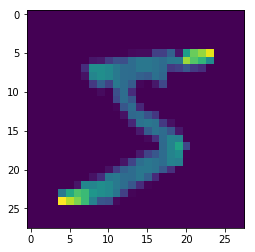

In [113]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [86]:
model.save('epic_num_reader.model')

In [114]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [117]:
predictions = new_model.predict(x_test)

In [118]:
print(predictions)

[[4.9372018e-10 7.7747231e-09 9.7956221e-10 ... 3.7949270e-09
  3.4416095e-11 8.3577430e-07]
 [9.9998701e-01 8.2596607e-08 3.6418719e-06 ... 4.8512721e-08
  3.1366970e-10 4.3316859e-06]
 [8.8250507e-10 5.3916369e-06 2.0892772e-05 ... 1.1652152e-06
  4.6350294e-07 2.9528467e-06]
 ...
 [1.1584074e-12 5.5814048e-10 9.0073630e-13 ... 1.6238615e-12
  1.5483742e-08 3.6198406e-07]
 [5.0005179e-05 1.0573277e-05 1.6819811e-05 ... 3.5049712e-07
  2.2239830e-05 9.3862684e-07]
 [1.5258565e-06 6.9397640e-07 3.2616757e-05 ... 2.8572974e-06
  9.9992299e-01 2.2259268e-05]]


In [147]:
import numpy as np 
print(np.argmax(predictions[1]))

0


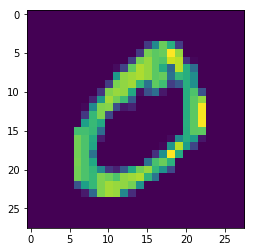

In [146]:
plt.imshow(x_test[1])
plt.show()